In [38]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

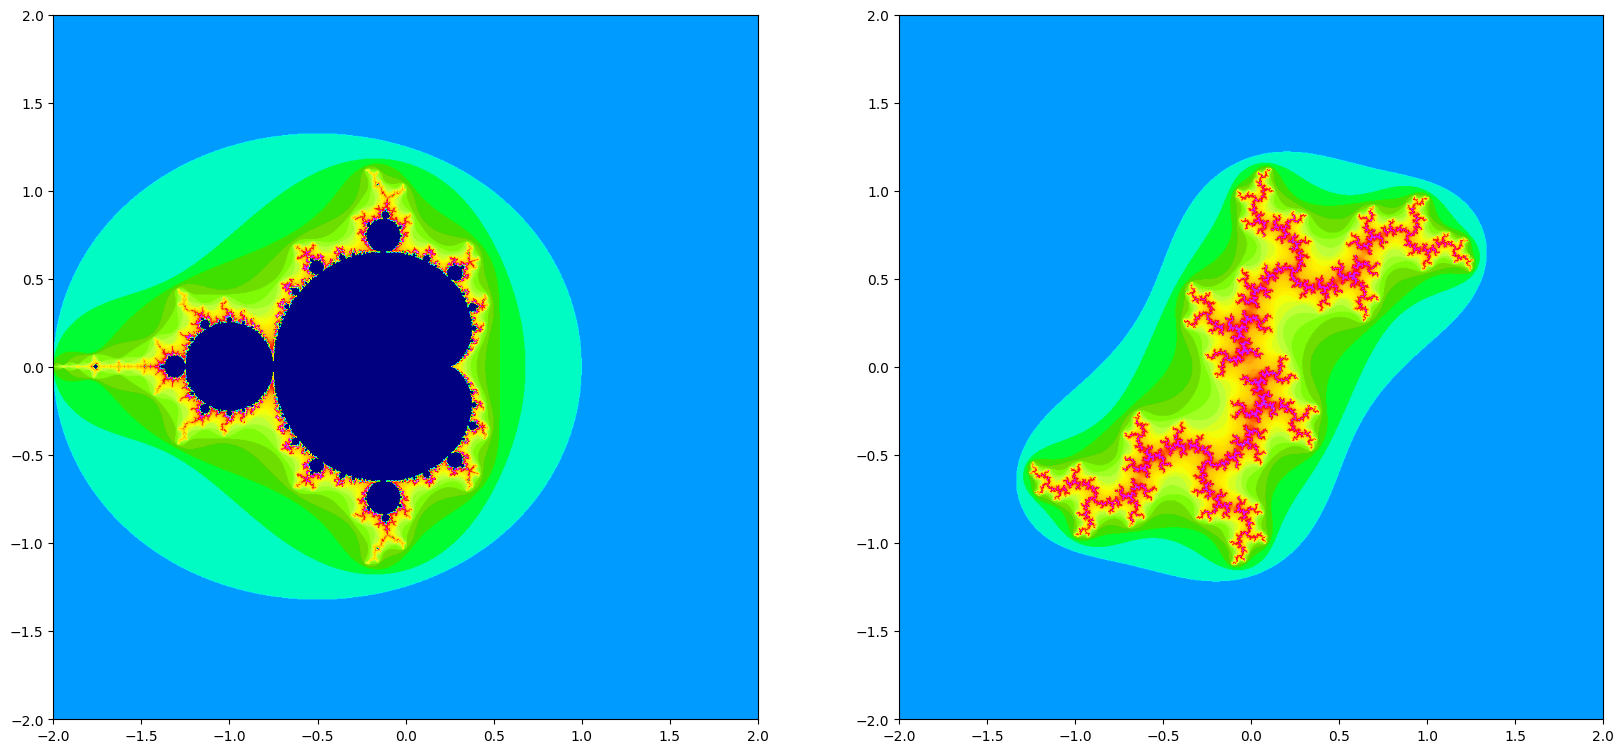

In [39]:
def draw_mandelbrot(min_val, max_val, res):
    x=np.linspace(min_val,max_val,res)
    y=np.linspace(min_val,max_val,res)
    c = np.add.outer(y*1j, x)
    
    def f(z):
        return z**2 + c

    im = np.zeros_like(c, dtype=np.float16)
    z = np.zeros_like(c)

    for i in range(100):
        z = f(z)
        im[(abs(z) > 2) & (im == 0)]=np.log(i+1)
    return im

def draw_julia(min_val, max_val, c, res):

    x=np.linspace(min_val,max_val,res)
    y=np.linspace(min_val,max_val,res)
    z = np.add.outer(y*1j, x)

    def f(z):
        return z**2 + c

    im = np.zeros_like(z, dtype=np.float16)

    for i in range(100):
        z = f(z)
        im[(abs(z) > 2) & (im == 0)]=np.log(i+1)
    return im
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 10))
ax1.imshow(draw_mandelbrot(-2, 2, 1000), extent=[-2,2,-2,2], cmap='gist_ncar')
ax2.imshow(draw_julia(-2, 2, 0.8j, 1000), extent=[-2,2,-2,2], cmap='gist_ncar')
fig.show()
